In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import os
import string
from IPython.display import Markdown, display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme()
%matplotlib inline

/Users/jana/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data loading and preview

In [2]:
def extract_csv_from_folder(folder_name: str) -> dict[str, str]:
    for root, dirs, files in os.walk(folder_name, topdown=False):
        df_paths: dict = {file: f'{root}/{file}' for file in files if file.endswith('csv')}
    return df_paths

In [3]:
df_paths = extract_csv_from_folder('competitive-data-science-predict-future-sales/raw')
df_paths

{'sales_train.csv': 'competitive-data-science-predict-future-sales/sales_train.csv',
 'shops.csv': 'competitive-data-science-predict-future-sales/shops.csv',
 'test.csv': 'competitive-data-science-predict-future-sales/test.csv',
 'item_categories.csv': 'competitive-data-science-predict-future-sales/item_categories.csv',
 'items.csv': 'competitive-data-science-predict-future-sales/items.csv',
 'sample_submission.csv': 'competitive-data-science-predict-future-sales/sample_submission.csv'}

In [4]:
def load_data(df_paths: dict[str, str]) -> dict[str, pd.DataFrame]:
    data: dict[str, pd.DataFrame] = {}
    
    for filename, path in df_paths.items():
        data[filename] = pd.read_csv(path)
        
    return data

In [5]:
data = load_data(df_paths)

In [6]:
def preview_data(data: dict[str, pd.DataFrame], n_head_values: int) -> None:
    for filename, df in data.items():
        print(filename)
        display(df.head(n_head_values))
        print()

In [7]:
preview_data(data, 5)

sales_train.csv


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0



shops.csv


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4



test.csv


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268



item_categories.csv


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4



items.csv


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40



sample_submission.csv


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


## Descride data

In [8]:
def print_md(string: str) -> None:
    display(Markdown(string))

In [9]:
def data_description(data: dict[str, pd.DataFrame]) -> None:
    for filename, df in data.items():
        print_md('---')
        print_md(f'### **{filename}**')
        
        print_md('*Shape:*')
        print(df.shape)
        
        print_md('*Basic info:*')
        display(df.info())
        
        print_md('*Percentages of missing value:*')
        print(df.isnull().sum() / df.shape[0] * 100)
        
        print_md('*Unique values for each column:*')
        display(df.nunique())
        
        print_md('*Summary statistics:*')
        display(df.describe())
        
        print_md('*Duplicated rows:*')
        display(df.groupby(df.columns.tolist(),as_index=False).size().query('size > 1'))

In [10]:
data_description(data)

---

### **sales_train.csv**

*Shape:*

(2935849, 6)


*Basic info:*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


None

*Percentages of missing value:*

date              0.0
date_block_num    0.0
shop_id           0.0
item_id           0.0
item_price        0.0
item_cnt_day      0.0
dtype: float64


*Unique values for each column:*

date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
dtype: int64

*Summary statistics:*

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


*Duplicated rows:*

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,size
39417,01.05.2014,16,50,3423,999.0,1.0,2
396537,05.01.2013,0,54,20130,149.0,1.0,2
1112896,12.07.2014,18,25,3423,999.0,1.0,2
2115422,23.02.2014,13,50,3423,999.0,1.0,2
2127417,23.03.2014,14,21,3423,999.0,1.0,2
2932915,31.12.2014,23,42,21619,499.0,1.0,2


---

### **shops.csv**

*Shape:*

(60, 2)


*Basic info:*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

*Percentages of missing value:*

shop_name    0.0
shop_id      0.0
dtype: float64


*Unique values for each column:*

shop_name    60
shop_id      60
dtype: int64

*Summary statistics:*

,shop_id
count,60.000000
mean,29.500000
std,17.464249
min,0.000000
25%,14.750000
50%,29.500000
75%,44.250000
max,59.000000


*Duplicated rows:*

,shop_name,shop_id,size


---

### **test.csv**

*Shape:*

(214200, 3)


*Basic info:*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


None

*Percentages of missing value:*

ID         0.0
shop_id    0.0
item_id    0.0
dtype: float64


*Unique values for each column:*

ID         214200
shop_id        42
item_id      5100
dtype: int64

*Summary statistics:*

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


*Duplicated rows:*

,ID,shop_id,item_id,size


---

### **item_categories.csv**

*Shape:*

(84, 2)


*Basic info:*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


None

*Percentages of missing value:*

item_category_name    0.0
item_category_id      0.0
dtype: float64


*Unique values for each column:*

item_category_name    84
item_category_id      84
dtype: int64

*Summary statistics:*

,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


*Duplicated rows:*

,item_category_name,item_category_id,size


---

### **items.csv**

*Shape:*

(22170, 3)


*Basic info:*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


None

*Percentages of missing value:*

item_name           0.0
item_id             0.0
item_category_id    0.0
dtype: float64


*Unique values for each column:*

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

*Summary statistics:*

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


*Duplicated rows:*

,item_name,item_id,item_category_id,size


---

### **sample_submission.csv**

*Shape:*

(214200, 2)


*Basic info:*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


None

*Percentages of missing value:*

ID                0.0
item_cnt_month    0.0
dtype: float64


*Unique values for each column:*

ID                214200
item_cnt_month         1
dtype: int64

*Summary statistics:*

,ID,item_cnt_month
count,214200.000000,214200.0
mean,107099.500000,0.5
std,61834.358168,0.0
min,0.000000,0.5
25%,53549.750000,0.5
50%,107099.500000,0.5
75%,160649.250000,0.5
max,214199.000000,0.5


*Duplicated rows:*

,ID,item_cnt_month,size


### Check dublicated rows

In [11]:
data['items.csv'].iloc[[21619, 20130, 3423]].item_name

21619                                 ЧЕЛОВЕК ДОЖДЯ (BD)
20130                            УЧЕНИК ЧАРОДЕЯ (регион)
3423     Far Cry 3 (Classics) [Xbox 360, русская версия]
Name: item_name, dtype: object

These products could be bought in such quantities in the store twice in one day, so this can be considered a coincidence, not a duplicate of the data

## Data Quality Check

#### Work individualy with every dataframe

### Sales_Train

In [103]:
sales_train = data['sales_train.csv'].copy()

In [105]:
sales_train.date = pd.to_datetime(sales_train.date)

In [106]:
sales_train['month'] = sales_train.date.dt.to_period('M')

In [107]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
0,2013-02-01,0,59,22154,999.00,1.0,2013-02
1,2013-03-01,0,25,2552,899.00,1.0,2013-03
2,2013-05-01,0,25,2552,899.00,-1.0,2013-05
3,2013-06-01,0,25,2554,1709.05,1.0,2013-06
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,2015-10
2935845,2015-09-10,33,25,7460,299.00,1.0,2015-09
2935846,2015-10-14,33,25,7459,349.00,1.0,2015-10
2935847,2015-10-22,33,25,7440,299.00,1.0,2015-10


In [108]:
sales_train_with_negative_item_cnt_day = sales_train[sales_train.item_cnt_day < 0]

In [109]:
assert sales_train_with_negative_item_cnt_day.index.nunique() == len(sales_train_with_negative_item_cnt_day)

In [110]:
returns_over_months = sales_train_with_negative_item_cnt_day.pivot_table(
                        index='month', 
                        columns='item_cnt_day', 
                        aggfunc='count'
                    ).fillna(0).date

In [111]:
returns_over_months.columns = returns_over_months.columns.astype(dtype='str')

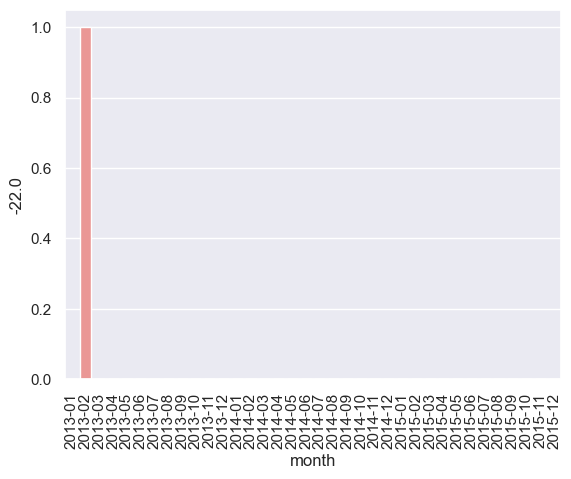

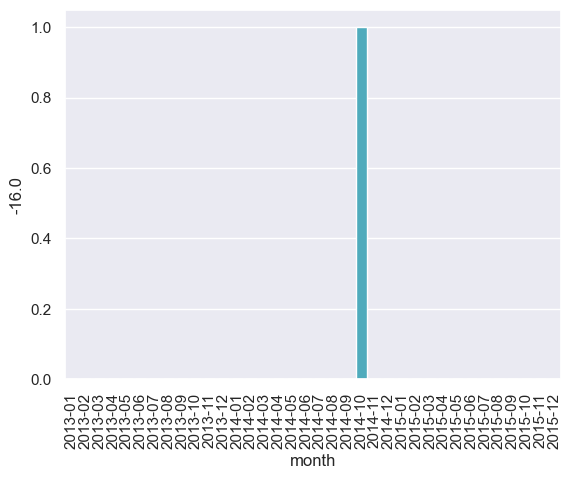

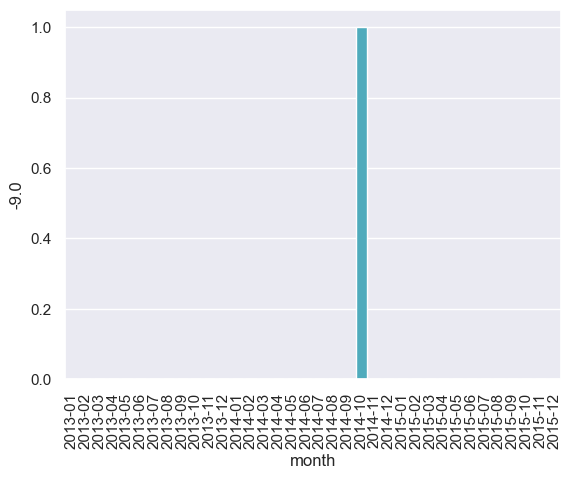

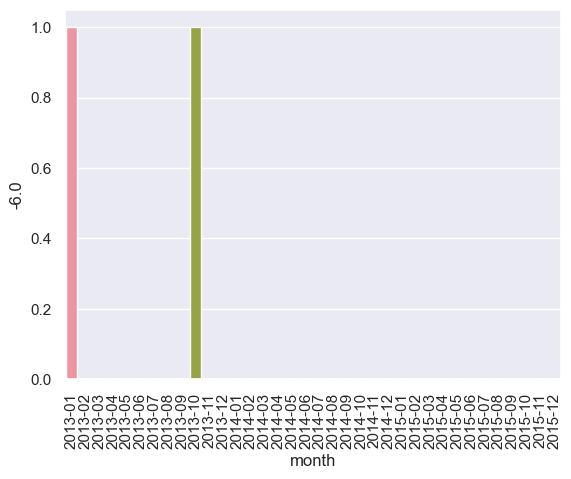

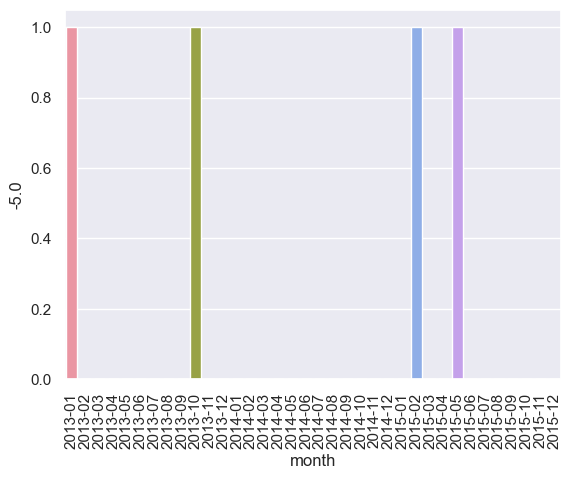

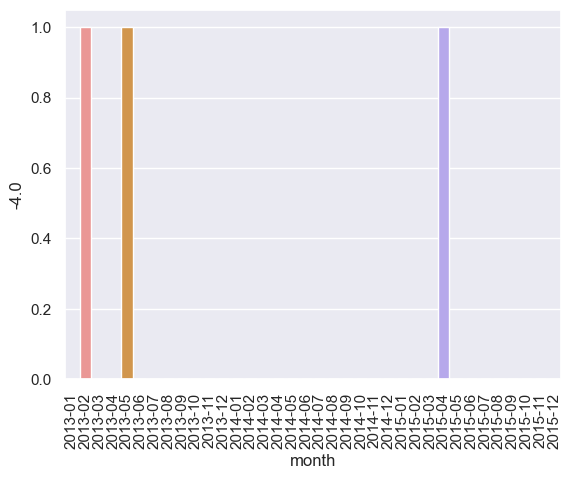

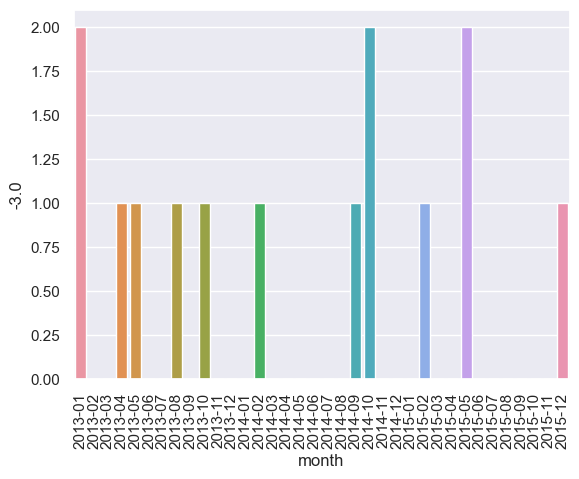

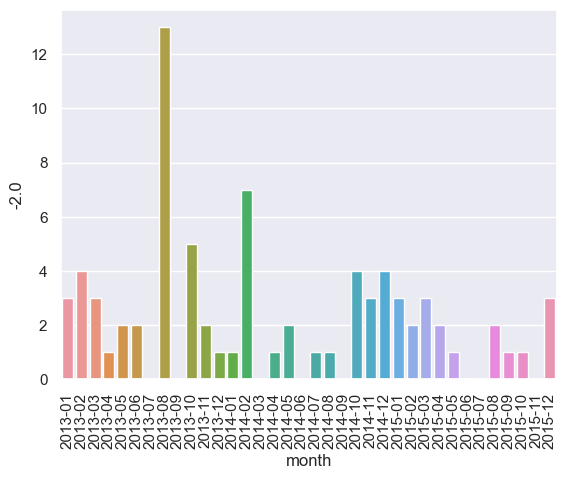

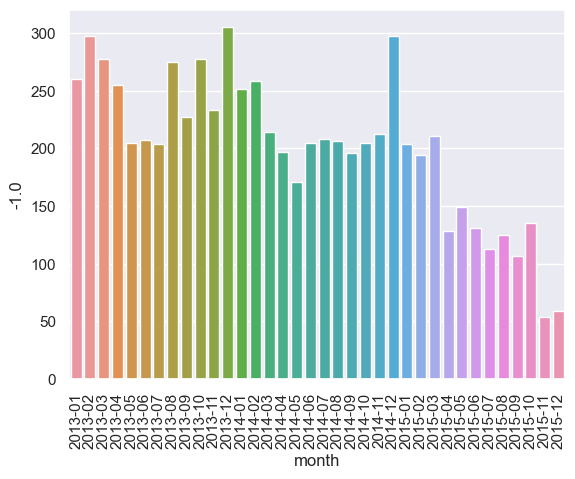

In [112]:
for i, column in enumerate(returns_over_months.columns):
    plt.figure(i)
    sns.barplot(x=returns_over_months.index.astype(dtype='str'), y=returns_over_months[column])
    plt.xticks(rotation=90)

According to the plots all returns that is lower than -2 can be consider outliers. 

In [113]:
sales_train = sales_train[sales_train.item_cnt_day > -2]

[Text(0.5, 1.0, 'Boxen plot for sales train item prices')]

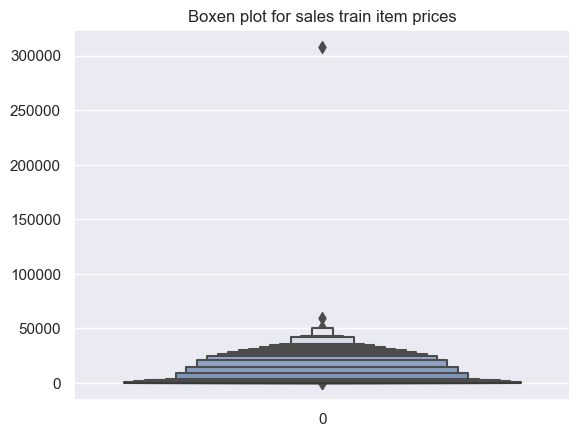

In [114]:
sns.boxenplot(sales_train.item_price, scale="linear", k_depth="trustworthy").set(
    title='Boxen plot for sales train item prices')

[Text(0.5, 1.0, 'Boxen plot for sales train item count per day')]

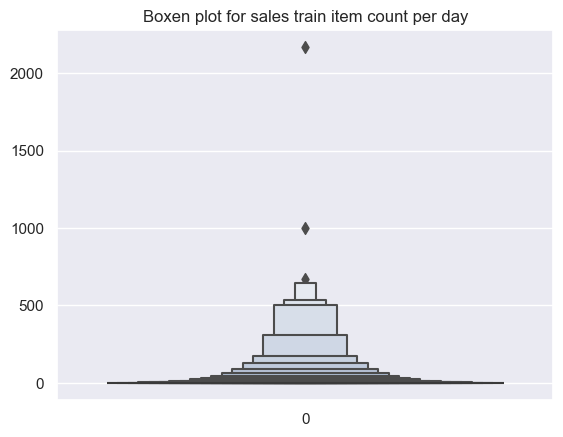

In [115]:
sns.boxenplot(sales_train.item_cnt_day, scale="linear", k_depth="trustworthy").set(
    title='Boxen plot for sales train item count per day')

There are some outliers in the item prices and item count per day, so we can cut 1% of top prices and item count per day

In [119]:
for column in ["item_price", "item_cnt_day"]:
    upper_bound = sales_train[column].quantile(0.99)
    sales_train = sales_train[sales_train[column] <= upper_bound]

Let's add column with total cost of item per day

In [120]:
sales_train['total_item_cost'] = sales_train.item_price * sales_train.item_cnt_day

In [121]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,total_item_cost
0,2013-02-01,0,59,22154,999.00,1.0,2013-02,999.00
1,2013-03-01,0,25,2552,899.00,1.0,2013-03,899.00
2,2013-05-01,0,25,2552,899.00,-1.0,2013-05,-899.00
3,2013-06-01,0,25,2554,1709.05,1.0,2013-06,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01,1099.00
...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,2015-10,299.00
2935845,2015-09-10,33,25,7460,299.00,1.0,2015-09,299.00
2935846,2015-10-14,33,25,7459,349.00,1.0,2015-10,349.00
2935847,2015-10-22,33,25,7440,299.00,1.0,2015-10,299.00


[Text(0.5, 1.0, 'Distribution of Item Count per Day')]

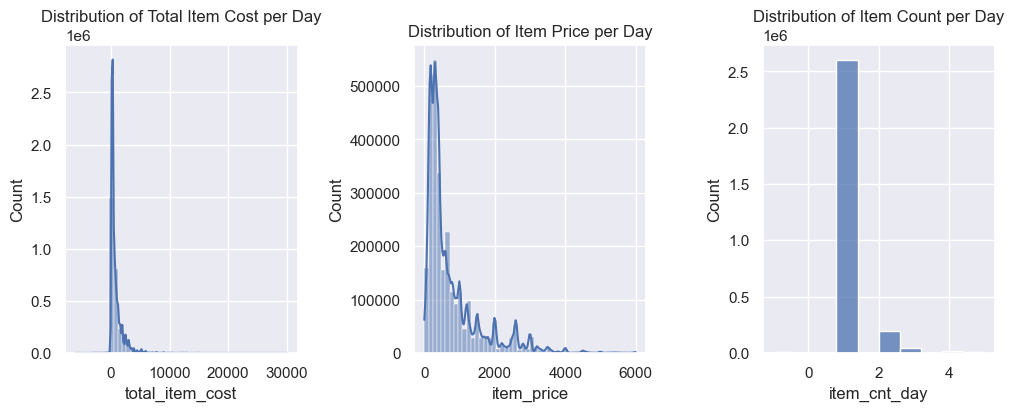

In [122]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
plt.subplots_adjust(wspace = 0.5)

sns.histplot(data = sales_train ,x=sales_train.total_item_cost, kde=True, bins=50, ax=axs[0]).set(
    title='Distribution of Total Item Cost per Day')

sns.histplot(data = sales_train ,x=sales_train.item_price, kde=True, bins=50, ax=axs[1]).set(
    title='Distribution of Item Price per Day')

sns.histplot(data = sales_train ,x=sales_train.item_cnt_day, kde=False, bins=10, ax=axs[2]).set(
    title='Distribution of Item Count per Day')

In [123]:
sales_by_month = sales_train.groupby('month').total_item_cost.sum()

[Text(0.5, 1.0, 'Distribution of Sales over Month')]

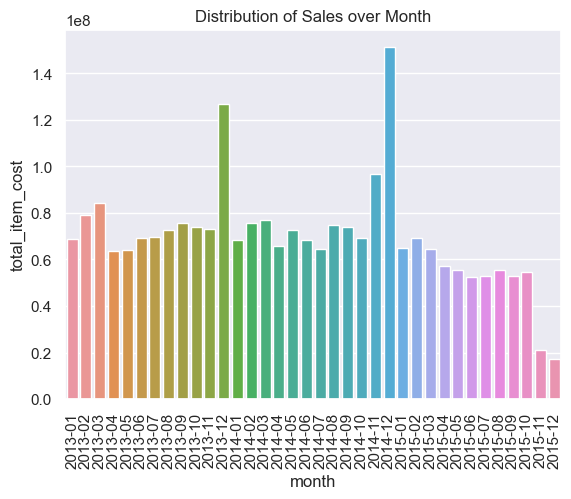

In [124]:
plt.xticks(rotation=90)
sns.barplot(x=sales_by_month.index.astype(dtype='str'), y=sales_by_month).set(
    title='Distribution of Sales over Month')

We see the expected sales peaks in December, when everyone buys gifts for the holidays. 

Also according to the description our training data was caming daily from January 2013 to October 2015. Thus data from November 2015 to December 2015 should not be taked into account. But this data can be used lately for validation our model

In [125]:
sales_train = sales_train[sales_train.month < '2015-11']

### Shops

In [126]:
shops = data['shops.csv'].copy()

In [127]:
assert len(shops) == len(shops.shop_id.unique())

In [128]:
shops[10:12]

,shop_name,shop_id
10,Жуковский ул. Чкалова 39м?,10
11,Жуковский ул. Чкалова 39м²,11


We have a shop with a typo, we can map it into one shop

In [129]:
shops = shops[shops.shop_id != 10]

In [130]:
sales_train.loc[sales_train.shop_id == 10, 'shop_id'] = 11

In [131]:
shops.shop_name = shops.shop_name.map(lambda x: x.lstrip('!'))

In [132]:
shops[['city', 'shop_name']] = shops['shop_name'].str.split(' ', n=1, expand=True)

In [133]:
number_of_shops_in_city = shops.groupby('city').count().shop_id

<AxesSubplot: xlabel='city'>

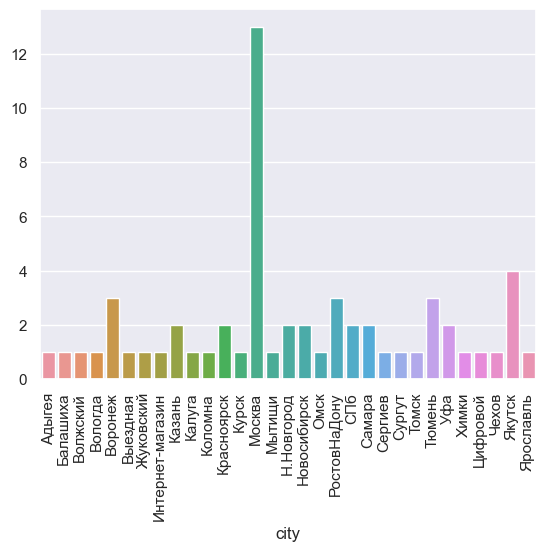

In [134]:
plt.xticks(rotation=90)
sns.barplot(x=number_of_shops_in_city.index, y=number_of_shops_in_city.values)

It cannot be considered outlier cause it is logical capital to have the biggest amount of shops

### Sales_Train (removing duplicated rows)

In [144]:
sales_train[sales_train[
        ['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']
    ].duplicated()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,total_item_cost
76962,2013-05-01,0,54,20130,149.0,1.0,2013-05,149.0
1435367,2014-02-23,13,50,3423,999.0,1.0,2014-02,999.0
1496766,2014-03-23,14,21,3423,999.0,1.0,2014-03,999.0
1671873,2014-01-05,16,50,3423,999.0,1.0,2014-01,999.0
1866340,2014-12-07,18,25,3423,999.0,1.0,2014-12,999.0
2198566,2014-12-31,23,42,21619,499.0,1.0,2014-12,499.0


In [148]:
sales_train = sales_train.drop_duplicates(
    subset=['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day'], 
    keep='last')

Remove duplicated sales within a day

### Test

In [135]:
test = data['test.csv'].copy()

In [136]:
missing_shops = [s for s in test["shop_id"].unique() if s not in sales_train["shop_id"].unique()]
missing_items = [i for i in test["item_id"].unique() if i not in sales_train["item_id"].unique()]

missing_shops_test = [s for s in sales_train["shop_id"].unique() if s not in test["shop_id"].unique()]
missing_items_test = [i for i in sales_train["item_id"].unique() if i not in test["item_id"].unique()]

In [137]:
print('Number of missing shops in train: ', len(missing_shops))
print('Number of missing items in train: ', len(missing_items))

print()

print('Number of missing shops in test: ', len(missing_shops_test))
print('Number of missing items in test: ', len(missing_items_test))

Number of missing shops in train:  1
Number of missing items in train:  409

Number of missing shops in test:  18
Number of missing items in test:  16846


In [138]:
print('Number of distinct shops in train: ', len(sales_train["shop_id"].unique()))
print('Number of distinct shops in test: ', len(test["shop_id"].unique()))

print()

print('Number of distinct items in train: ', len(sales_train["item_id"].unique()))
print('Number of distinct items in test: ', len(test["item_id"].unique()))

Number of distinct shops in train:  59
Number of distinct shops in test:  42

Number of distinct items in train:  21537
Number of distinct items in test:  5100


In [139]:
test.loc[test.shop_id == 10, 'shop_id'] = 11

### Items

In [182]:
items = data['items.csv'].copy()
items.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [183]:
items.item_name = items.item_name.map(lambda x: x.lstrip('!*/'))

In [184]:
assert(len(items) == items.item_id.nunique())

In [185]:
assert(len(items) == len(items.item_name.map(lambda x: x.lower()).unique()))

AssertionError: 

There are some same items names, maybe they can be mapped to one item

In [186]:
same_items_regargless_case = items[items.item_name.map(lambda x: x.lower()).duplicated()]
same_items_regargless_case.head(5)

,item_name,item_id,item_category_id
8248,АЛЫЕ ПАРУСА (регион),8248,40
8290,АНГЛИЙСКИЙ ВМЕСТЕ С ХРЮШЕЙ И… ч. 1 (регион),8290,40
8299,АНДРЕЙ РУБЛЕВ (регион),8299,40
8423,АФОНЯ (регион),8423,40
8617,БАРБИ В РОЛИ ПРИНЦЕССЫ ОСТРОВА (регион),8617,40


In [187]:
print("Number of same items (regardless of word's case): ", same_items_regargless_case.shape[0])

Number of same items (regardless of word's case):  60


In [188]:
print('Fully same items:')
fully_same = items.groupby(items.item_name, as_index=False).size().query('size > 1')
display(fully_same)

Fully same items:


,item_name,size
14673,МИХЕЙ И ДЖУМАНДЖИ Сука любовь,2


This items we can replace with one item

In [189]:
fully_same_item_names = fully_same.item_name.values

In [190]:
fully_same_item_ids = items[items.item_name.isin(fully_same_item_names)].item_id.values

In [191]:
sales_train[sales_train.item_id.isin(fully_same_item_ids)].sort_values('item_id').head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,total_item_cost
48191,2013-01-30,0,15,14690,199.0,1.0,2013-01,199.0
1863891,2014-07-22,18,25,14690,199.0,1.0,2014-07,199.0
1858929,2014-07-28,18,21,14690,199.0,1.0,2014-07,199.0
1843598,2014-07-26,18,4,14690,199.0,1.0,2014-07,199.0
1839971,2014-07-19,18,57,14690,199.0,1.0,2014-07,199.0


In [192]:
test[test.item_id.isin(fully_same_item_ids)].sort_values('item_id').head(5)

,ID,shop_id,item_id
2171,2171,5,14690
119471,119471,53,14690
124571,124571,52,14690
129671,129671,47,14690
134771,134771,48,14690


There is only one presence of one of these dublicates, so we can just drop it

In [193]:
items = items[items.item_id != 12]

In [194]:
sales_train = sales_train[sales_train.item_id != 12]

Now let's deal with case-sensitive dublicate items

In [195]:
items[items.item_name.map(lambda x: x.lower()) == 'СКАЗКИ НА НОЧЬ (регион)'.lower()]

,item_name,item_id,item_category_id
18718,СКАЗКИ НА НОЧЬ (Регион),18718,40
18719,СКАЗКИ НА НОЧЬ (регион),18719,40


Let's find shops which use items with postfix "регион" in lower and upper case

In [196]:
same_items_regargless_case_names = same_items_regargless_case[~same_items_regargless_case.item_name.isin(
    fully_same_item_names)].item_name

In [197]:
same_items = items[items.item_name.map(lambda x: x.lower()).isin(
                same_items_regargless_case_names.map(lambda x: x.lower()))]

In [198]:
same_items

,item_name,item_id,item_category_id
8247,АЛЫЕ ПАРУСА (Регион),8247,40
8248,АЛЫЕ ПАРУСА (регион),8248,40
8289,АНГЛИЙСКИЙ ВМЕСТЕ С ХРЮШЕЙ И… ч. 1 (Регион),8289,40
8290,АНГЛИЙСКИЙ ВМЕСТЕ С ХРЮШЕЙ И… ч. 1 (регион),8290,40
8298,АНДРЕЙ РУБЛЕВ (Регион),8298,40
...,...,...,...
21850,ШЕРЛОК ХОЛМС И ДОКТОР ВАТСОН (регион),21850,40
21869,ШИРЛИ-МЫРЛИ (Регион),21869,40
21870,ШИРЛИ-МЫРЛИ (регион),21870,40
22023,ЭКИПАЖ (Регион),22023,40


In [199]:
same_items_upper_case = same_items[same_items.item_name.str.endswith('(Регион)')]
same_items_lower_case = same_items[same_items.item_name.str.endswith('(регион)')]

In [245]:
assert (len(same_items_upper_case) + len(same_items_lower_case) == len(same_items))

In [242]:
shops_upper_case = sales_train[sales_train.item_id.isin(same_items_upper_case.item_id)].shop_id.unique()
shops_lower_case = sales_train[sales_train.item_id.isin(same_items_lower_case.item_id)].shop_id.unique()

shops_upper_case.sort()
shops_lower_case.sort()

In [246]:
assert (np.array_equal(shops_upper_case, shops_lower_case))

Shops that uses different case regions is the same, thus we can assume, that this does not reflects any geological standing. With that, we can merge products together

In [203]:
assert (same_items_upper_case.item_id.values == same_items_lower_case.item_id.map(lambda x: x - 1).values).all()

Our upper case items differ from lower case items by 1

In [204]:
items = items[~items.item_id.isin(same_items_lower_case.item_id)]

In [205]:
sales_train.loc[sales_train.item_id.isin(same_items_lower_case.item_id), 'item_id'] = \
    sales_train[sales_train.item_id.isin(same_items_lower_case.item_id)].item_id.map(lambda x: x - 1)

In [206]:
test.loc[test.item_id.isin(same_items_lower_case.item_id), 'item_id'] = \
    test[test.item_id.isin(same_items_lower_case.item_id)].item_id.map(lambda x: x - 1)

In [208]:
items[items.item_name.apply(lambda x: x.strip(string.punctuation + ' ')).duplicated()]

,item_name,item_id,item_category_id
13012,КТО Я?,13012,40


In [209]:
items[items.item_name.str.contains('КТО Я')]

,item_name,item_id,item_category_id
13011,КТО Я,13011,40
13012,КТО Я?,13012,40


In [216]:
print('Number of duplicated variations of the item:')

print(len(sales_train[sales_train.item_id == 13011]))
print(len(sales_train[sales_train.item_id == 13012]))

print(len(test[test.item_id == 13011]))
print(len(test[test.item_id == 13012]))

Number of duplicated variations of the item:
45
3
42
0


We can map it to one item without punctiation

In [217]:
items = items[items.item_id != 13012]

In [218]:
sales_train.loc[sales_train.item_id == 13012, 'item_id'] = 13011
test.loc[test.item_id == 13012, 'item_id'] = 13011

### Item category

In [219]:
item_categories = data['item_categories.csv'].copy()

In [220]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [221]:
assert(len(item_categories)
       == item_categories.item_category_id.nunique() 
       == item_categories.item_category_name.map(lambda x: x.lower()).nunique())

In [222]:
item_categories[item_categories.item_category_name.apply(lambda x: x.strip(string.punctuation + ' ')).duplicated()]

,item_category_name,item_category_id


There is no obvious dupicates in the table

In [223]:
sales_train = pd.merge(sales_train, items, on='item_id', how='inner')
sales_train = pd.merge(sales_train, item_categories, on='item_category_id', how='inner')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,total_item_cost,item_name,item_category_id,item_category_name
0,2013-02-01,0,59,22154,999.0,1.0,2013-02,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-23,0,24,22154,999.0,1.0,2013-01,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-01-20,0,27,22154,999.0,1.0,2013-01,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-02-01,0,25,22154,999.0,1.0,2013-02,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-03-01,0,25,22154,999.0,1.0,2013-03,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [224]:
sales_train.isna().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
month                 0
total_item_cost       0
item_name             0
item_category_id      0
item_category_name    0
dtype: int64

In [225]:
unique_item_category = sales_train[["item_id", "item_category_id"]].groupby(["item_id"]).nunique("item_category_id")
len(unique_item_category[unique_item_category.item_category_id > 1])

0

Each item in trainig belong to only one category

In [226]:
print('Number of unique categories in traing: ', sales_train.item_category_id.nunique())

Number of unique categories in traing:  84


In [227]:
test_with_cat = pd.merge(test, items, on='item_id', how='inner')

In [228]:
print('Number of unique categories in traing: ', test_with_cat.item_category_id.nunique())

Number of unique categories in traing:  62


In [229]:
missing_categories = [c for c in test_with_cat["item_category_id"].unique() \
                      if c not in sales_train["item_category_id"].unique()]

missing_categories_test = [c for c in sales_train["item_category_id"].unique() \
                           if c not in test_with_cat["item_category_id"].unique()]

In [230]:
print('Number of missing categories in train: ', len(missing_categories))
print('Number of missing categories in test: ', len(missing_categories_test))

Number of missing categories in train:  0
Number of missing categories in test:  22


In [231]:
categories_info = pd.DataFrame(columns=['first_sale', 'last_sale', 'min_price',
                                       'max_price', 'mean_price', 'median_price',
                                       'mean_item_cnt', 'median_item_cnt',
                                       'mean_item_cnt_jan', 'mean_item_cnt_feb',
                                       'mean_item_cnt_mar', 'mean_item_cnt_apr',
                                       'mean_item_cnt_may', 'mean_item_cnt_jun',
                                       'mean_item_cnt_jul', 'mean_item_cnt_aug',
                                       'mean_item_cnt_sep', 'mean_item_cnt_oct',
                                       'mean_item_cnt_nov', 'mean_item_cnt_dec'],
                              index=item_categories.item_category_id)

In [232]:
month_mapping = {1: "mean_item_cnt_jan", 2: "mean_item_cnt_feb", 3: "mean_item_cnt_mar",
                 4: "mean_item_cnt_apr", 5: "mean_item_cnt_may", 6: "mean_item_cnt_jun",
                 7: "mean_item_cnt_jul", 8: "mean_item_cnt_aug", 9: "mean_item_cnt_sep",
                 10: "mean_item_cnt_oct", 11: "mean_item_cnt_nov", 12: "mean_item_cnt_dec"}

In [233]:
for cat in categories_info.index:
    
    sales_train_cat = sales_train[sales_train.item_category_id == cat].copy()
    
    categories_info.loc[cat, 'first_sale'] = sales_train_cat.date.min()
    categories_info.loc[cat, 'last_sale'] = sales_train_cat.date.max()
    
    categories_info.loc[cat, 'min_price'] = sales_train_cat.item_price.min()
    categories_info.loc[cat, 'max_price'] = sales_train_cat.item_price.max()
    categories_info.loc[cat, 'mean_price'] = sales_train_cat.item_price.mean()
    categories_info.loc[cat, 'median_price'] = sales_train_cat.item_price.median()
    
    sales_train_cat = sales_train_cat[["date", "item_cnt_day", "total_item_cost"]].groupby(
        sales_train_cat.month.astype('datetime64')).sum().reset_index()
    
    sales_train_cat = sales_train_cat.groupby(sales_train_cat["month"].dt.month).mean().reset_index()
    
    categories_info.loc[cat, 'mean_item_cnt'] = sales_train_cat.item_cnt_day.mean()
    categories_info.loc[cat, 'median_item_cnt'] = sales_train_cat.item_cnt_day.median()
    
    for month in sales_train_cat.month:
        categories_info.loc[cat, month_mapping[month]] = \
            sales_train_cat[sales_train_cat.month == month].item_cnt_day.values[0]

In [234]:
categories_info = categories_info.fillna(0)

In [235]:
categories_info

,first_sale,last_sale,min_price,max_price,mean_price,median_price,mean_item_cnt,median_item_cnt,mean_item_cnt_jan,mean_item_cnt_feb,mean_item_cnt_mar,mean_item_cnt_apr,mean_item_cnt_may,mean_item_cnt_jun,mean_item_cnt_jul,mean_item_cnt_aug,mean_item_cnt_sep,mean_item_cnt_oct,mean_item_cnt_nov,mean_item_cnt_dec
item_category_id,,,,,,,,,,,,,,,,,,,,
0,2013-02-04,2013-10-01,22.40,148.0,87.800000,93.0,1.500000,1.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
1,2013-02-20,2013-10-01,148.00,283.0,215.500000,215.5,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
2,2013-01-01,2015-10-30,93.00,5990.0,2164.435073,2390.0,582.375000,461.000000,625.666667,695.333333,593.000000,448.333333,444.333333,462.000000,450.666667,457.666667,460.000000,436.000000,555.5,1360.0
3,2013-01-01,2015-10-31,122.61,5992.0,2089.598363,2090.0,880.875000,763.833333,754.333333,935.000000,705.333333,605.666667,621.666667,675.333333,643.333333,855.000000,884.000000,773.333333,780.5,2337.0
4,2013-01-01,2015-10-06,22.00,2590.0,554.666422,299.0,71.916667,70.000000,96.666667,90.000000,88.000000,70.333333,71.333333,69.666667,68.000000,58.000000,67.500000,45.000000,50.0,88.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2013-01-01,2015-10-31,9.00,5900.0,1072.684794,999.0,421.402778,396.333333,395.666667,352.666667,448.666667,344.000000,320.000000,299.333333,328.333333,397.000000,449.666667,432.000000,578.5,711.0
80,2015-01-05,2015-10-09,900.00,1700.0,1229.362881,1300.0,220.700000,104.500000,62.000000,61.000000,53.000000,92.000000,117.000000,121.000000,176.000000,388.000000,1047.000000,90.000000,0.0,0.0
81,2013-01-01,2015-03-26,79.00,599.0,189.151324,149.0,45.541667,42.500000,74.000000,46.500000,36.000000,44.000000,62.000000,41.000000,73.000000,68.000000,35.000000,23.500000,23.5,20.0


[Text(0.5, 1.0, 'First sale distribution')]

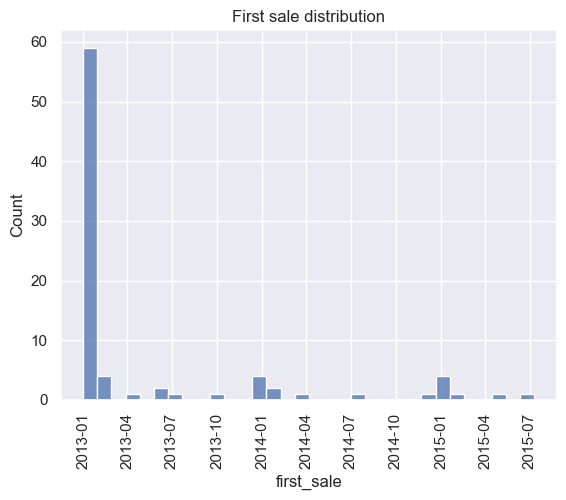

In [236]:
plt.xticks(rotation=90)
sns.histplot(data=categories_info, x=pd.to_datetime(categories_info.first_sale, errors='coerce')).set(
    title='First sale distribution')

[Text(0.5, 1.0, 'Last sale distribution')]

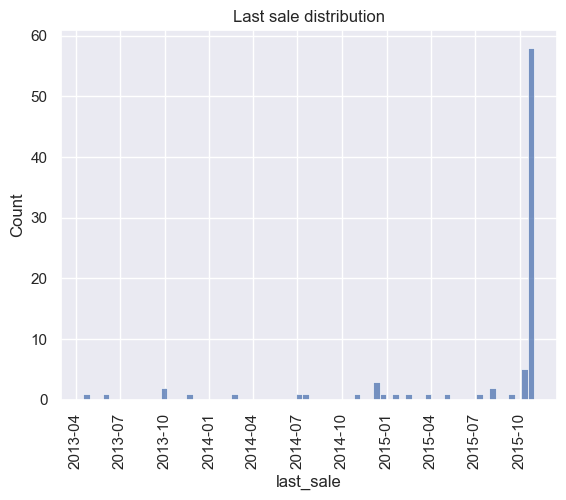

In [237]:
plt.xticks(rotation=90)
sns.histplot(data=categories_info, x=pd.to_datetime(categories_info.last_sale, errors='coerce')).set(
    title='Last sale distribution')

[Text(0.5, 1.0, 'Median price distribution')]

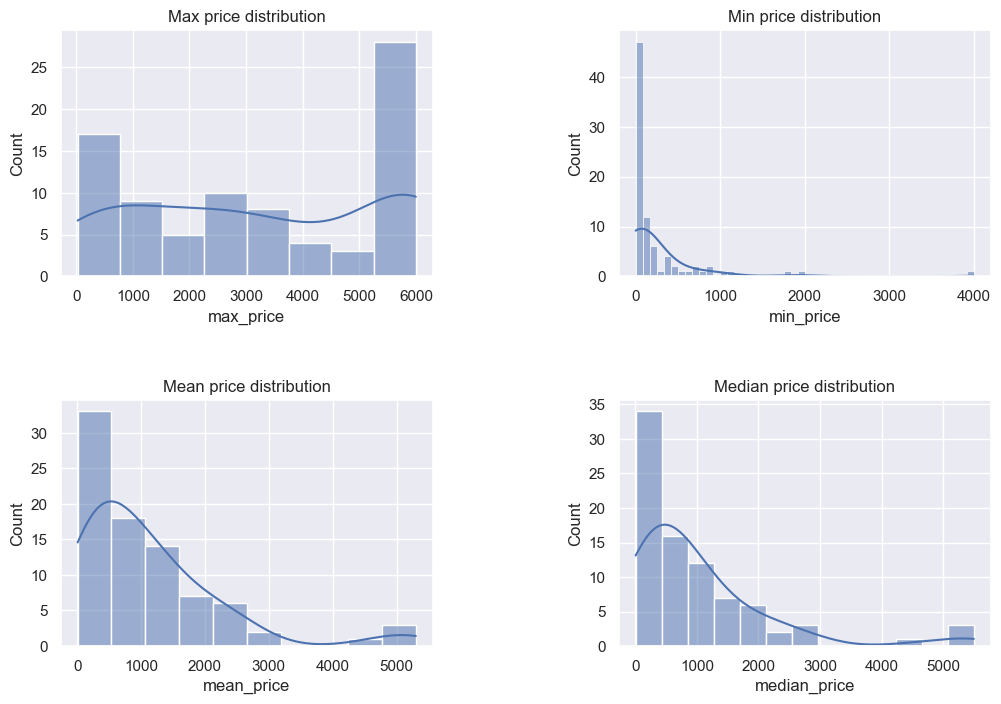

In [238]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

sns.histplot(data=categories_info, x=categories_info.max_price, ax=axs[0,0], kde=True).set(
    title='Max price distribution')

sns.histplot(data=categories_info, x=categories_info.min_price, ax=axs[0,1], kde=True).set(
    title='Min price distribution')

sns.histplot(data=categories_info, x=categories_info.mean_price, ax=axs[1,0], kde=True).set(
    title='Mean price distribution')

sns.histplot(data=categories_info, x=categories_info.median_price, ax=axs[1,1], kde=True).set(
    title='Median price distribution')

## Final data examination

In [239]:
sales_train = pd.merge(sales_train, shops, on='shop_id', how='inner')

In [240]:
sales_train.isna().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
month                 0
total_item_cost       0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
city                  0
dtype: int64